In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

from keras.datasets import mnist, cifar10

import pandas as pd

from IPython.display import clear_output


Using TensorFlow backend.


(1365, 2048, 3)


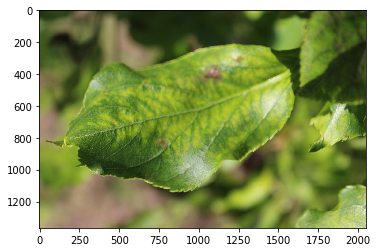

In [8]:
img = plt.imread('images/Train_0.jpg')
print(img.shape)
plt.imshow(img)

In [15]:
x_test = pd.read_csv('test.csv')
x_train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [20]:
train

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [14]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [16]:
sample_submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [23]:
img

array([[[ 33,  51,  13],
        [ 33,  51,  13],
        [ 33,  51,  13],
        ...,
        [ 51,  61,  27],
        [ 51,  61,  27],
        [ 51,  61,  27]],

       [[ 33,  51,  13],
        [ 33,  51,  13],
        [ 33,  51,  13],
        ...,
        [ 50,  60,  26],
        [ 50,  60,  26],
        [ 50,  60,  26]],

       [[ 33,  51,  13],
        [ 33,  51,  13],
        [ 33,  51,  13],
        ...,
        [ 50,  60,  26],
        [ 50,  60,  26],
        [ 50,  60,  26]],

       ...,

       [[181, 167, 120],
        [182, 168, 121],
        [182, 168, 121],
        ...,
        [199, 206, 152],
        [197, 202, 148],
        [196, 201, 145]],

       [[181, 167, 120],
        [182, 168, 121],
        [182, 168, 121],
        ...,
        [200, 207, 155],
        [200, 204, 153],
        [202, 206, 155]],

       [[181, 167, 120],
        [182, 168, 121],
        [182, 168, 121],
        ...,
        [205, 213, 164],
        [206, 212, 164],
        [212, 215, 168]]

In [31]:
img_df = []

In [32]:
for ind in range (10):
    img_df.append(plt.imread('images/Train_' + str(ind) + '.jpg'))

In [35]:
type(img_df)

list

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train_images = []
for name in train['image_id'] :
    path = 'images/'+name+'.jpg'
    image = plt.imread(path)
    train_images.append(image)

In [4]:
train_images[0].shape

(1365, 2048, 3)

In [5]:
X = np.ndarray(shape=(len(train_images),1365,2048,3),dtype=np.float32)
 

MemoryError: Unable to allocate 56.9 GiB for an array with shape (1821, 1365, 2048, 3) and data type float32

Нуууууу, столько у меня места явно нет, поэтому можно попытаться уменьшить разрешения картинок

У pyplot я не нашёл, как можно изменить разрешение картинок, поэтому использую OpenCV

In [ ]:
pip install opencv-python

In [6]:
import cv2

In [68]:
train_images = []
img_size = 256
for name in train['image_id'] :
    path = 'images/'+name+'.jpg'
    image = plt.imread(path)
    image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_images.append(image)

In [69]:
train_images[1].shape

(256, 256, 3)

In [70]:
X = np.ndarray(shape=(len(train_images),img_size,img_size,3),dtype=np.float32)

In [71]:
for i,image in enumerate(train_images) :
    X[i] = image

In [72]:
X = X/255   

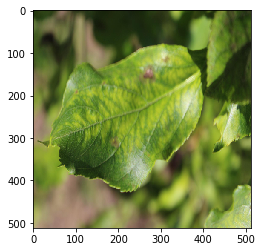

In [63]:
plt.imshow(X[0])

In [82]:
X.shape

(1821, 256, 256, 3)

Ура, не знаю почему, но именно эта часть у меня заняла 1.5 дня...

Теперь быстренько с тестовыми разбираемся

In [64]:
test = pd.read_csv("test.csv")

In [83]:
test_images = []
img_size = 256
for name in test['image_id'] :
    path = 'images/'+name+'.jpg'
    image = plt.imread(path)
    image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_images.append(image)

In [77]:
y_train = train.drop('image_id',axis=1)
y_train = np.array(y_train)
y_train.shape

(1821, 4)

In [84]:
X_test = np.ndarray(shape=(len(test_images),img_size,img_size,3),dtype=np.float32)

for i,image in enumerate(test_images) :
    X_test[i]=image

X_test = X_test / 255 

In [85]:
X_test.shape

(1821, 256, 256, 3)

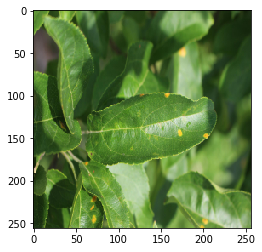

In [86]:
plt.imshow(X_test[0])